# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Melodia Salsabila Irsanti
- **Email:** melodiairsanty@gmail.com
- **ID Dicoding:** melodiasalsabila

## Menentukan Pertanyaan Bisnis

Sebelum membuat pertanyaan yang, berikut merupakan **keterangan** dari tiap variabel yang ada,
*  year: data tahun observasi
*  month: data bulan observasi
*  day: data hari observasi
*  hour: data jam observasi
*  PM2.5: konsentrasi PM2.5 (μ/m$^3$)
*  PM10: konsentrasi PM10 (μ/m$^3$)
*  SO2: konsentrasi SO2 (μ/m$^3$)
*  NO2: konsentrasi NO2 (μ/m$^3$)
*  CO: konsentrasi CO (μ/m$^3$)
*  O3: konsentrasi O3 (μ/m$^3$)
*  TEMP: temperatur (degree Celsius)
*  PRES: tekanan udara (hPa)
*  DEWP: *dew point temperature* ($^o$C)
*  RAIN: presipitasi (mm)
*  wd: arah angin
*  WSPM: kecepatan angin (m/s)
*  station: nama *station* tempat monitoring kualitas udara



---



Berikut antara lain **pertanyaan** yang akan dicaritahu jawabannya dalam proses analisis data dalam *notebook* ini:
1. **Bagaimanakah rata-rata kualitas udara Beijing secara keseluruhan pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017?**
2. **Bagaimanakah perbandingan rata-rata kualitas udara antar Kotamadya di Beijing pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017?**
3. **Bagaimanakah kecenderungan temperatur yang ada di Kotamadya Dongsi pada Bulan April tahun 2013?**
4. **Selama periode waktu 1 Maret 2013 s.d. 28 Februari 2017, arah angin kemana yang paling banyak ada di Kotamadya Tiantan?**



## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Pertama-tama, akan dilakukan import data terlebih dahulu. Data yang digunakan berasal dari dataset air quality untuk seluruh Kotamadya yang ada di Beijing (sejumlah 12 dataset). Disini, akan dilakukan mounting Google Drive, pembacaan file CSV, dan pembuatan variabel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_aotizhongxin = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df_changping = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
df_dingling = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
df_dongsi = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
df_guanyuan = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
df_gucheng = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
df_huairou = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
df_nongzhanguan = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df_shunyi = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
df_tiantan = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
df_wanliu = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
df_wanshouxigong = pd.read_csv(r"/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

Lalu, seluruh dataframe yang ada di concatenate menjadi satu dataframe besar yaitu `df`



In [ ]:
df = pd.concat([df_aotizhongxin,df_changping,df_dingling,df_dongsi,df_guanyuan,df_gucheng,df_huairou,df_nongzhanguan,df_shunyi,df_tiantan,df_wanliu,df_wanshouxigong], ignore_index=True)
df = df.drop(['No'], axis=1)
print(df)

        year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1       2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3       2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4       2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
420763  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5   
420764  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
420765  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0  10.8   
420766  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
420767  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

          PRES  DEWP  RAIN   wd  WSPM        station  
0       

### Assessing Data

Untuk assessing data, akan dilakukan pengecekan missing value, data duplikat, serta outlier yang ada di `df`. Pertama-tama, dilakukan pengecekan missing value dengan `isnull()` dan dengan `sum()` untuk merangkum hasilnya

In [ ]:
# pengecekan missing value
df.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

terlihat bahwa masih ada banyak missing value di dataset yang digunakan, nantinya hal ini akan ditangani di tahap cleaning data.

Selanjutnya, dilakukan pengecekan nilai duplikat dengan menggunakan `duplicated()` dan sama seperti sebelumnya, menggunakan `sum()`

In [ ]:
# pengecekan nilai duplikat
df.duplicated().sum()

0

Dapat dilihat bahwa tidak ada nilai duplikat sehingga nantinya tidak perlu melakukan penanganan terhadap observasi yang sekiranya merupakan nilai duplikat.

Selanjutnya akan dicari nilai outlier bagi tipe data numerik. Maka, sebelum itu akan di cek terlebih dahulu kolom mana saja yang memiliki tipe data numerik dengan menggunakan `dtypes`

In [ ]:
# pengecekan data type untuk mengecek outlier
df.dtypes

year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

Setelah itu, dilakukan pengecekan untuk kolom-kolom numerik dengan membuat fungsi `get_num_outliers`

In [ ]:
# pengecekan outlier

def get_num_outliers (column):
 q1 = np.percentile(column, 25)
 q3 = np.percentile(column, 75)
 return sum((column < q1) | (column > q3))

df[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM","station"]].groupby('station').agg([get_num_outliers])

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers
station,,,,,,,,,,,
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0


### Cleaning Data

Dilanjutkan dengan cleaning data. Berdasarkan data yang ada, tidak akan dilakukan proses penanganan missing value seperti misalnya melakukan penghapusan baris, imputasi, hingga interpolasi dikarenakan biasanya teknik ini dilakukan dalam proses pembuatan model machine learning dan hanya akan dilakukan pengisian string berisi informasi mengenai tidak adanya data.

Maka, untuk menanganinya kita akan mengisikan string berisikan pesan "Data not available!" pada kolom di dataframe `df` dengan tipe data kategorik menggunakan `fillna()`

In [ ]:
# dilakukan pengisian NaN untuk kolom object dengan string "Data not available!"
df["wd"].fillna('Data not available!', inplace=True)
df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd             0
WSPM         318
station        0
dtype: int64

Tetapi, agar dapat dilakukan EDA maka akan dilakukan imputasi terhadap nilai numerik yang ada dalam dataframe `df` dengan menggunakan `transform()`

In [ ]:
# pengisian kolom numerik dengan mean
fti = [i for i in df.iloc[:,4:].columns if df[i].dtypes != 'object'] #FEATURES TO IMPUTE
imputed = df.groupby("station")[fti].transform(lambda x: x.fillna(x.mean()))
new_df = pd.concat([df[df.columns.symmetric_difference(imputed.columns)],imputed],axis=1)

new_df.isna().sum()

day        0
hour       0
month      0
station    0
wd         0
year       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
dtype: int64

Setelah diketahui bahwa tidak ada lagi missing value pada kolom-kolom di dataframe `df`, dapat dilanjutkan ke tahapan lainnya

## Exploratory Data Analysis (EDA)

### Explore descriptive statistics of overall numerical data and data according to the stations name


Statistik deskriptif data numerik secara keseluruhan:




In [ ]:
new_df[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,1.729701
std,79.984694,91.075152,21.420157,34.677400,1131.69545,55.767436,11.430737,10.469404,13.787251,0.820624,1.245924
min,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.00000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Pada *output* `describe()` diatas yang menghasilkan statistik deskriptif data yang ada di dalam `new_df`, dapat dilihat ciri data yang ada pada data keseluruhan Beijing dari seluruh *station*. Beberapa informasi yang sekiranya bisa diambil dari output diatas antara lain adalah bagaimana konsentrasi SO2 di Beijing memiliki nilai minimum sebesar 0.285600 (μ/m$^3$), dan

Statistik deskriptif data numerik berdasarkan kotamadya:

In [ ]:
new_df.groupby("station")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].describe()

PM2.5                                                       \
                 count       mean        std  min   25%   50%    75%    max   
station                                                                       
Aotizhongxin   35064.0  82.773611  81.045038  3.0  23.0  61.0  112.0  898.0   
Changping      35064.0  71.099743  71.524179  2.0  18.0  48.0   98.0  882.0   
Dingling       35064.0  65.989497  71.460423  3.0  14.0  42.0   91.0  881.0   
Dongsi         35064.0  86.194297  85.644198  3.0  23.0  63.0  117.0  737.0   
Guanyuan       35064.0  82.933372  80.219412  2.0  24.0  61.0  113.0  680.0   
Gucheng        35064.0  83.852089  82.030179  2.0  25.0  61.0  114.0  770.0   
Huairou        35064.0  69.626367  70.250314  2.0  18.0  48.0   96.0  762.0   
Nongzhanguan   35064.0  84.838483  85.449681  2.0  23.0  60.0  114.0  844.0   
Shunyi         35064.0  79.491602  80.167173  2.0  20.0  57.0  109.0  941.0   
Tiantan        35064.0  82.164911  80.136357  3.0  23.0  60.0  112.0  821.0   
Wanliu         35064.0  83.374716  81.458179  2.0  24.0  60.0  115.0  957.0   
Wanshouxigong  35064.0  85.024136  85.118393  3.0  23.0  62.0  115.0  999.0   

                  PM10              ... RAIN           WSPM            \
                 count        mean  ...  75%   max    count      mean   
station                             ...                                 
Aotizhongxin   35064.0  110.060391  ...  0.0  72.5  35064.0  1.708496   
Changping      35064.0   94.657871  ...  0.0  52.1  35064.0  1.853836   
Dingling       35064.0   83.739723  ...  0.0  52.1  35064.0  1.853836   
Dongsi         35064.0  110.336742  ...  0.0  46.4  35064.0  1.860785   
Guanyuan       35064.0  109.023303  ...  0.0  72.5  35064.0  1.708496   
Gucheng        35064.0  118.861978  ...  0.0  41.9  35064.0  1.343310   
Huairou        35064.0   91.482690  ...  0.0  45.9  35064.0  1.652021   
Nongzhanguan   35064.0  108.991096  ...  0.0  46.4  35064.0  1.860785   
Shunyi         35064.0   98.737026  ...  0.0  37.3  35064.0  1.807533   
Tiantan        35064.0  106.363672  ...  0.0  46.4  35064.0  1.860785   
Wanliu         35064.0  110.464618  ...  0.0  72.5  35064.0  1.501215   
Wanshouxigong  35064.0  112.223459  ...  0.0  46.4  35064.0  1.745314   

                                                   
                    std  min  25%  50%  75%   max  
station                                            
Aotizhongxin   1.203831  0.0  0.9  1.4  2.2  11.2  
Changping      1.309005  0.0  1.0  1.5  2.3  10.0  
Dingling       1.309005  0.0  1.0  1.5  2.3  10.0  
Dongsi         1.280113  0.0  1.0  1.5  2.4  10.5  
Guanyuan       1.203831  0.0  0.9  1.4  2.2  11.2  
Gucheng        1.150375  0.0  0.6  1.0  1.8  12.0  
Huairou        1.198305  0.0  0.9  1.3  2.0  12.9  
Nongzhanguan   1.280113  0.0  1.0  1.5  2.4  10.5  
Shunyi         1.287009  0.0  1.0  1.5  2.3  12.8  
Tiantan        1.280113  0.0  1.0  1.5  2.4  10.5  
Wanliu         1.104252  0.0  0.8  1.2  2.0  11.2  
Wanshouxigong  1.206131  0.0  0.9  1.4  2.3  13.2  

[12 rows x 88 columns]

maka kita telah mendapatkan statistik deskriptif data untuk kualitas udara di Beijing secara keseluruhan maupun berdasarkan station masing-masing observasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Bagaimanakah rata-rata kualitas udara Beijing secara keseluruhan pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017?**

Tingkatan kualitas udara dapat ditentukan dengan menggunakan indeks yang bernama Indeks Standar Pencemar Udara (ISPU). Menurut Direktorat Pengendalian Pencemaran Udara Kementerian Lingkungan Hidup dan Kehutanan (2020), ISPU dapat dihitung menggunakan rumus dibawah ini

$$I = \frac{I_a-I_b}{X_a-X_b}(X_x-X_b)+I_b$$

dimana,\
$I$ = ISPU terhitung\
$I_a$ = ISPU batas atas\
$I_b$ = ISPU batas bawah\
$X_a$ = Konsentrasi ambien batas atas (μ/m$^3$)\
$X_b$ = Konsentrasi ambien batas bawah (μ/m$^3$)\
$X_x$ = Konsentrasi ambien nyata hasil pengukuran (μ/m$^3$)


Hanya saja, berdasarkan variabel yang ada indeks lengkap belum dapat dihitung secara mendetail dan membutuhkan penelitian lebih lanjut. Maka hanya akan dilakukan perbandingan beberapa variabel dengan batas atas kualitas udara yang dianggap baik sebagai berikut:

*   PM2.5 sebesar 15.5 μg/m$^3$
*   PM10 sebesar 50 μg/m$^3$
*   SO2 sebesar 52 μg/m$^3$
*   NO2 sebesar 80 μg/m$^3$
*   CO sebesar 4000 μg/m$^3$
*   O3 sebesar 120 μg/m$^3$

Dengan keterangan berikut, maka akan dibuat barplot sebagai perbandingan antara angka rata-rata dari data tiap variabel tersebut secara keseluruhan di Beijing.

Pertama-tama akan dibuat dataframe `df_Q1` berisi data rata-rata asli dan standar dari Direktorat Pengendalian Pencemaran Udara KLHK







In [ ]:
# pembuatan dataframe
df_Q1 = pd.DataFrame({'parameter': ["PM2.5","PM10","SO2","NO2","CO","O3"],
                      'batas_atas': [15.5, 50, 52, 80, 4000, 120],
                      'mean_Beijing': [new_df["PM2.5"].mean(), new_df["PM10"].mean(), new_df["SO2"].mean(), new_df["NO2"].mean(), new_df["CO"].mean(), new_df["O3"].mean()]})
df_Q1


,parameter,batas_atas,mean_Beijing
0,PM2.5,15.5,79.780235
1,PM10,50.0,104.578547
2,SO2,52.0,15.820683
3,NO2,80.0,50.583319
4,CO,4000.0,1230.625090
5,O3,120.0,57.349235


Selanjutnya akan dilakukan pembuatan barplot sebagai visualisasi karena meskipun dari data tersebut sudah mampu terlihat perbedaannya, perbedaan akan lebih jelas terlihat jika dilakukan visualisasi.

Akan dilakukan modifikasi terhadap dataset `df_Q1` menjadi `df_melted` sebagai penyesuaian untuk pembuatan visualisasi berupa barplot

In [ ]:
# modifikasi dataframe
df_melted = df_Q1.melt(id_vars = ['parameter'])
df_melted

,parameter,variable,value
0,PM2.5,batas_atas,15.500000
1,PM10,batas_atas,50.000000
2,SO2,batas_atas,52.000000
3,NO2,batas_atas,80.000000
4,CO,batas_atas,4000.000000
5,O3,batas_atas,120.000000
6,PM2.5,mean_Beijing,79.780235
7,PM10,mean_Beijing,104.578547
8,SO2,mean_Beijing,15.820683
9,NO2,mean_Beijing,50.583319


<Axes: xlabel='parameter', ylabel='value'>

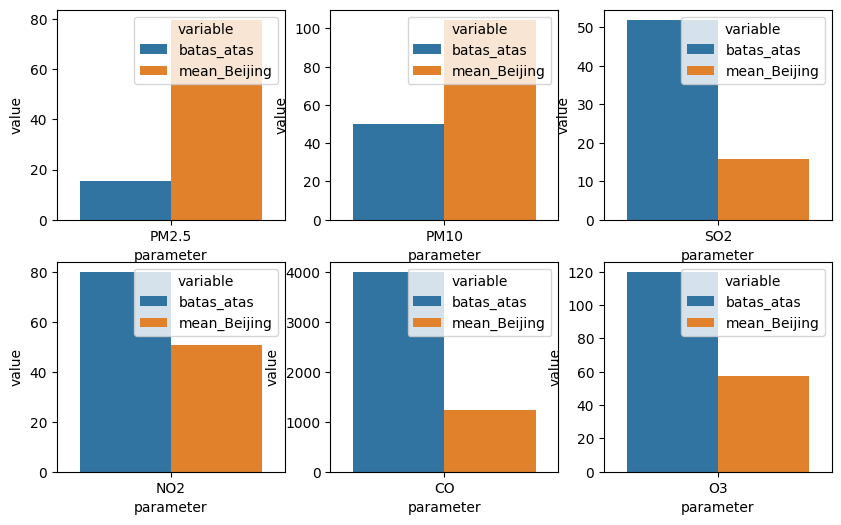

In [ ]:
# pembuatan barplot
plt.figure(figsize=(10,6))

# PM2.5
plt.subplot(2,3,1)
sns.barplot(data = df_melted[df_melted["parameter"] == "PM2.5"], x = "parameter", y = "value", hue = "variable")

# PM10
plt.subplot(2,3,2)
sns.barplot(data = df_melted[df_melted["parameter"] == "PM10"], x = "parameter", y = "value", hue = "variable")

# SO2
plt.subplot(2,3,3)
sns.barplot(data = df_melted[df_melted["parameter"] == "SO2"], x = "parameter", y = "value", hue = "variable")

# NO2
plt.subplot(2,3,4)
sns.barplot(data = df_melted[df_melted["parameter"] == "NO2"], x = "parameter", y = "value", hue = "variable")

# CO
plt.subplot(2,3,5)
sns.barplot(data = df_melted[df_melted["parameter"] == "CO"], x = "parameter", y = "value", hue = "variable")

# O3
plt.subplot(2,3,6)
sns.barplot(data = df_melted[df_melted["parameter"] == "O3"], x = "parameter", y = "value", hue = "variable")

dari plot di atas diketahui bahwa:
*   Kadar PM2.5 rata-rata keseluruhan Beijing berada di atas batas atas sehingga hal ini dapat menjadi salah satu indikator bahwa kualitas udara Beijing masih belum cukup baik
*   Kadar PM10 rata-rata keseluruhan Beijing berada di atas batas atas sehingga hal ini dapat menjadi salah satu indikator bahwa kualitas udara Beijing masih belum cukup baik
*   Kadar SO2 rata-rata keseluruhan Beijing berada di bawah batas atas sehingga hal ini dapat menjadi salah satu indikator bahwa kualitas udara Beijing sudah cukup baik
*   Kadar NO2 rata-rata keseluruhan Beijing berada di bawah batas atas sehingga hal ini dapat menjadi salah satu indikator bahwa kualitas udara Beijing sudah cukup baik
*   Kadar CO rata-rata keseluruhan Beijing berada di bawah batas atas sehingga hal ini dapat menjadi salah satu indikator bahwa kualitas udara Beijing sudah cukup baik
*   Kadar O3 rata-rata keseluruhan Beijing berada di bawah batas atas sehingga hal ini dapat menjadi salah satu indikator bahwa kualitas udara Beijing sudah cukup baik

Sehingga jika dilihat secara umum dari indikator-indikator yang ada, dapat disimpulkan bahwa kualitas udara keseluruhan Beijing pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017 sudah cukup baik. Tetapi, indikator yang ada di atas belum cukup lengkap untuk dapat menjadi penentu kualitas udara karena masih ada faktor lainnya seperti misalnya curah hujan, arah angin, dll.

### Pertanyaan 2:

**Bagaimanakah perbandingan rata-rata kualitas udara antar Kotamadya di Beijing pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017?**

Pendekatan yang dilakukan untuk kasus ini juga serupa dimana nantinya akan dilakukan hal yang serupa yaitu dengan menggunakan visualisasi berupa barplot.

Pertama-tama, akan dilakukan pembuatan dataframe terlebih dahulu yang berisikan data rata-rata dari tiap kotamadya untuk tiap-tiap komponen:

In [ ]:
# Group by the 'Category' column
grouped = df.groupby("station").mean()  # for example, using mean as an aggregate function

# Create DataFrame from the groupby result
df_Q2 = grouped.reset_index()
df_Q2 = df_Q2[["station","PM2.5","PM10","SO2","NO2","CO","O3"]]

df_Q2

<ipython-input-16-f3f10eadceff>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("station").mean()  # for example, using mean as an aggregate function


,station,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358
1,Changping,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003
2,Dingling,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371
3,Dongsi,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637
4,Guanyuan,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044
5,Gucheng,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879
6,Huairou,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713
7,Nongzhanguan,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682
8,Shunyi,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321
9,Tiantan,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297


In [ ]:
# modifikasi dataframe
df_melted2 = df_Q2.melt(id_vars = ['station'])
df_melted2 = df_melted2.rename(columns={'variable': 'parameter'})
df_melted2

,station,parameter,value
0,Aotizhongxin,PM2.5,82.773611
1,Changping,PM2.5,71.099743
2,Dingling,PM2.5,65.989497
3,Dongsi,PM2.5,86.194297
4,Guanyuan,PM2.5,82.933372
...,...,...,...
67,Nongzhanguan,O3,58.534682
68,Shunyi,O3,55.201321
69,Tiantan,O3,55.984297
70,Wanliu,O3,48.873614


<Axes: xlabel='parameter', ylabel='value'>

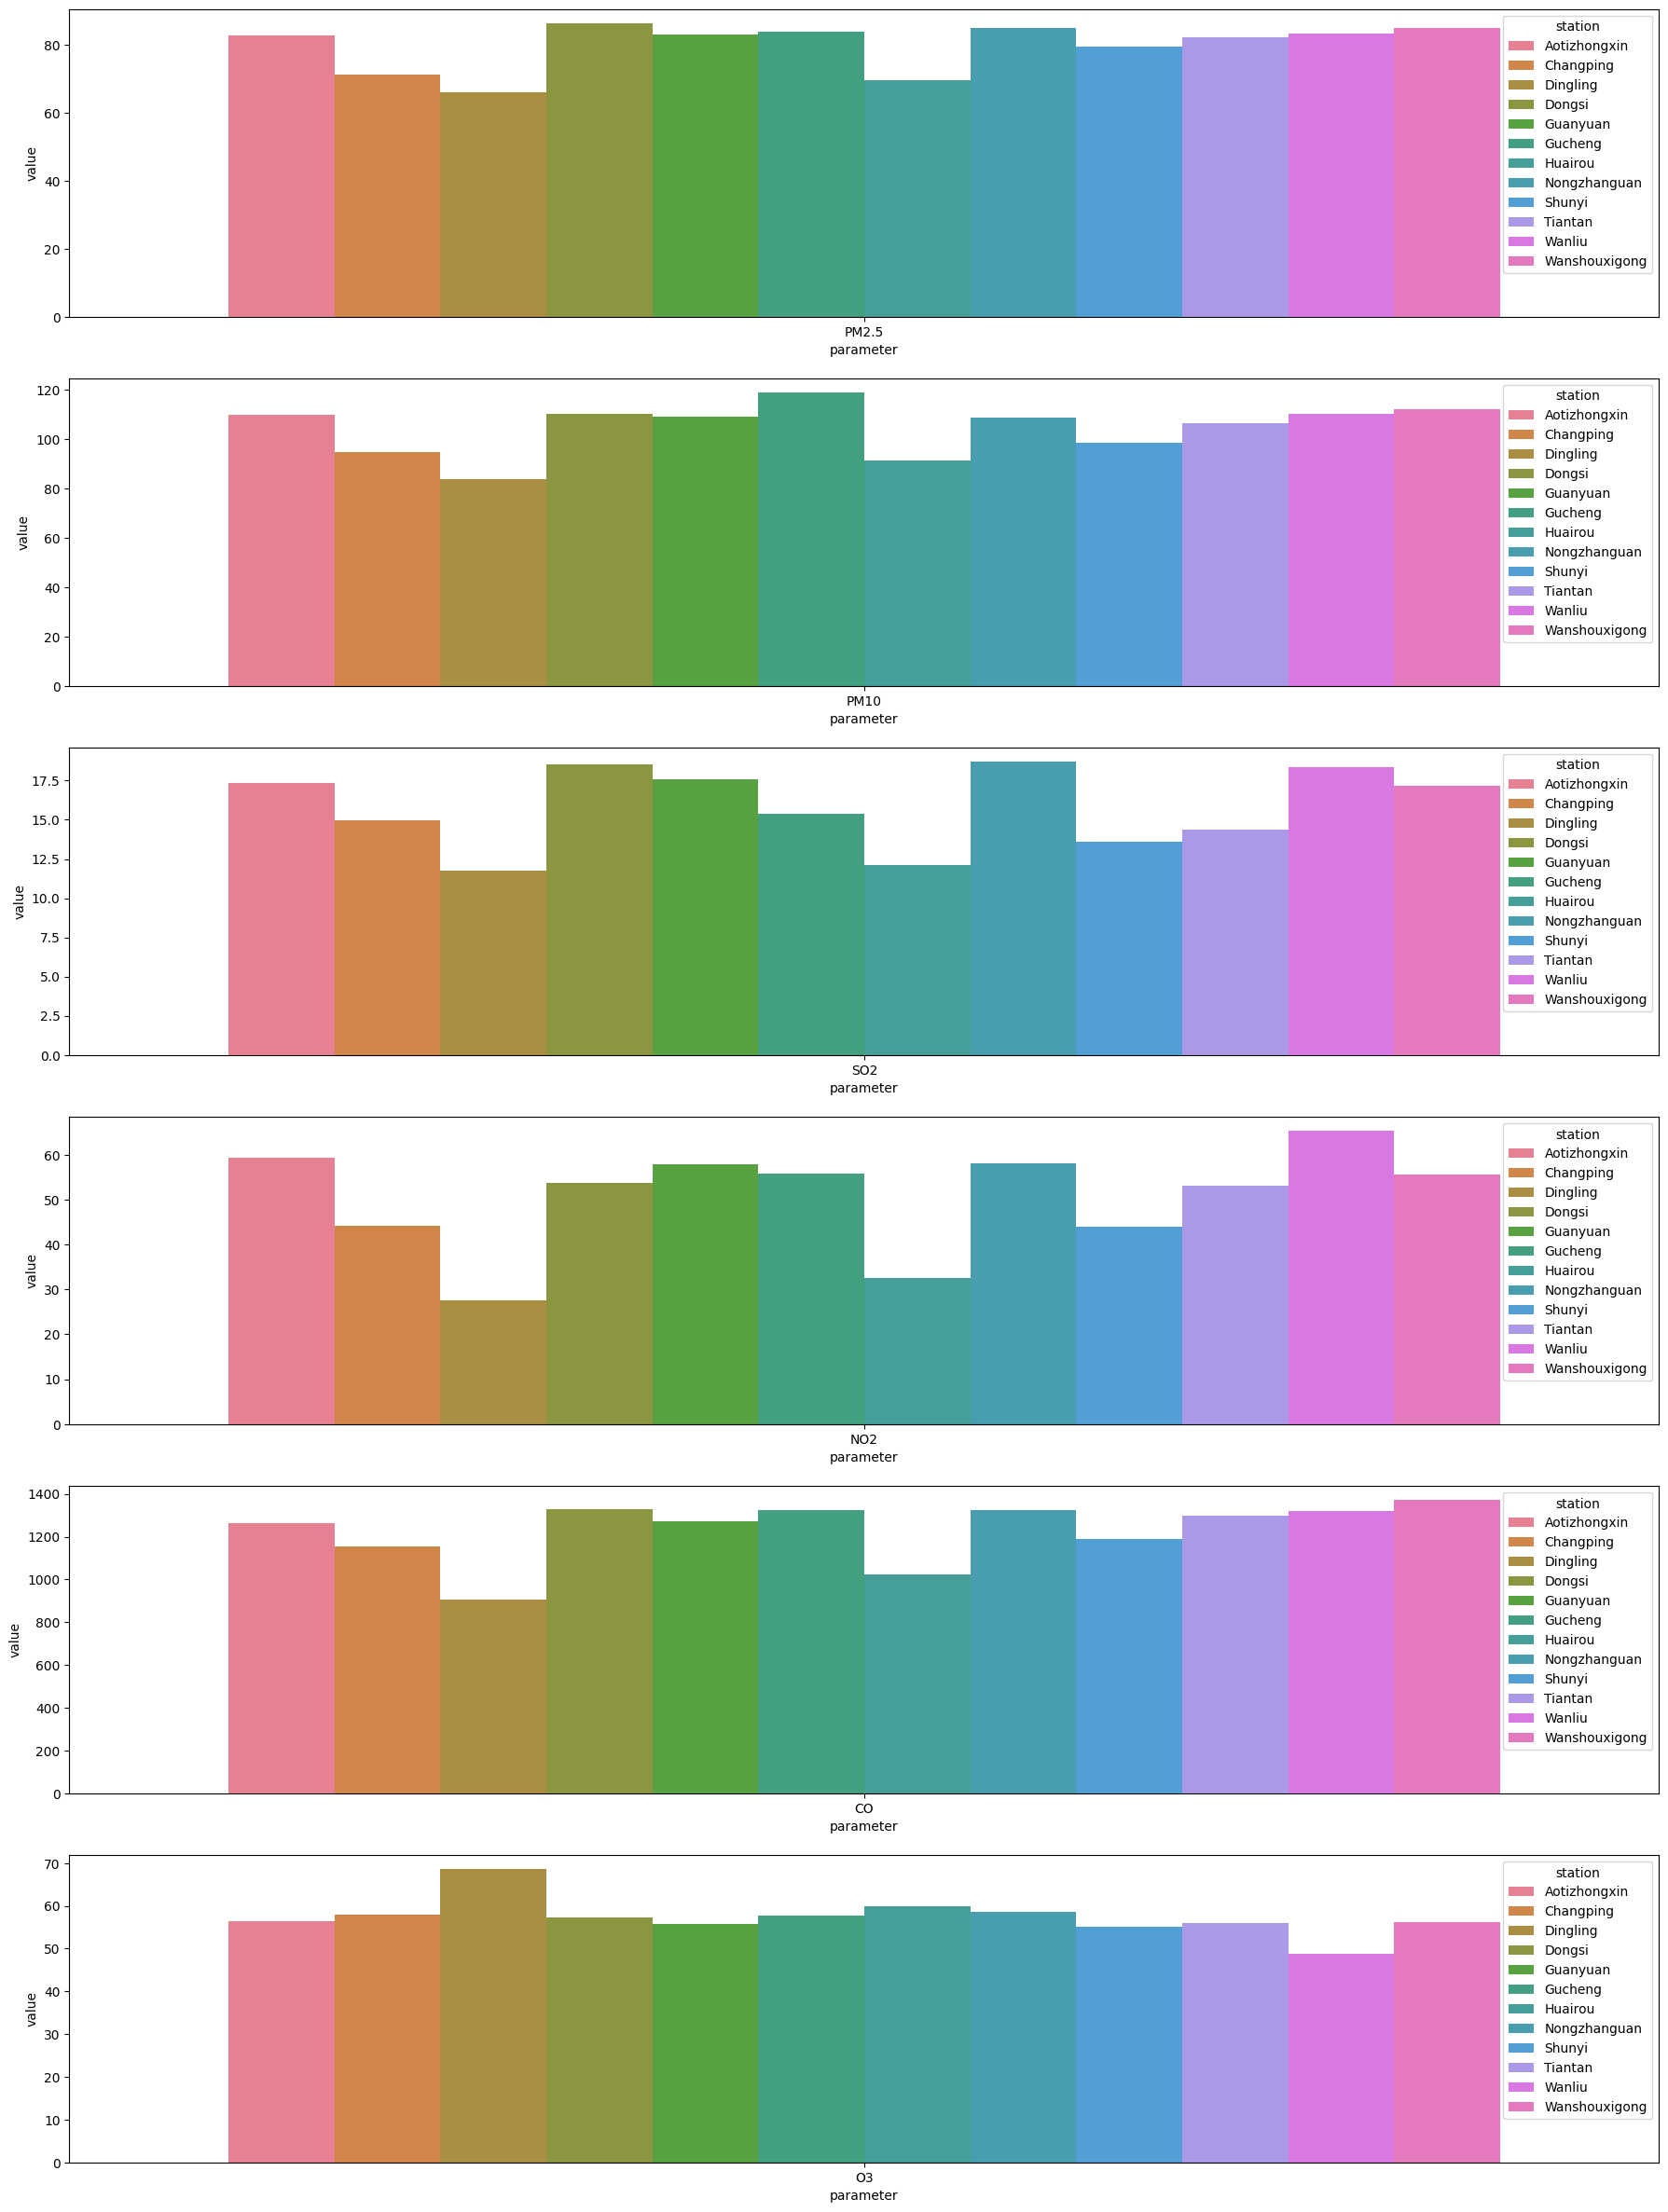

In [ ]:
# pembuatan barplot
plt.figure(figsize=(22,30))

# PM2.5
plt.subplot(6,1,1)
sns.barplot(data = df_melted2[df_melted2["parameter"] == "PM2.5"], x = "parameter", y = "value", hue = "station")

# PM10
plt.subplot(6,1,2)
sns.barplot(data = df_melted2[df_melted2["parameter"] == "PM10"], x = "parameter", y = "value", hue = "station")

# SO2
plt.subplot(6,1,3)
sns.barplot(data = df_melted2[df_melted2["parameter"] == "SO2"], x = "parameter", y = "value", hue = "station")

# NO2
plt.subplot(6,1,4)
sns.barplot(data = df_melted2[df_melted2["parameter"] == "NO2"], x = "parameter", y = "value", hue = "station")

# CO
plt.subplot(6,1,5)
sns.barplot(data = df_melted2[df_melted2["parameter"] == "CO"], x = "parameter", y = "value", hue = "station")

# O3
plt.subplot(6,1,6)
sns.barplot(data = df_melted2[df_melted2["parameter"] == "O3"], x = "parameter", y = "value", hue = "station")

Dari visualisasi di atas, dapat diamati secara kasat mata bagaimana perbandingan rata-rata kualitas udara di kotamadya-kotamadya di Beijing melalui beberapa indikator seperti misalnya kadar PM10 dan SO2 di udara.

Antara lain kesimpulan yang dapat diambil adalah:
*   Secara umum, Huairou adalah salah satu Kotamadya yang memiliki kandungan terendah dibandingkan dengan Kotamadya lainnya sehingga hal ini mungkin saja menunjukkan bahwa kualitas udara Huairou adalah salah satu yang paling baik dibandingkan Kotamadya lainnya di Beijing
*   Sebaliknya, ada pula Kotamadya yang hampir selalu memiliki kandungan yang tinggi seperti misalnya antara lain adalah Wanshouxigong dan Aotizhongxin. Hal ini mungkin saja menunjukkan bahwa kualitas udara Wanshouxigong dan Aotizhongxin adalah salah satu yang paling buruk dibandingkan Kotamadya lainnya di Beijing
*  Selama periode waktu yang telah ditentukan, Dingling merupakan Kotamadya yang paling banyak mengandung O3 dibandingkan dengan Kotamadya lainnya di Beijing yaitu berada di sekitaran angka 60-70.

Dapat pula dilakukan penarikan kesimpulan bagi indikator lainnya berdasarkan kasus serupa yang tertera dalam plot di atas.


### Pertanyaan 3:

**Bagaimanakah kecenderungan temperatur yang ada di Kotamadya Dongsi pada Bulan April tahun 2013?**

Untuk mengetahui hal ini, maka akan dilakukan pembuatan lineplot untuk melihat perkembangan suatu variabel sepanjang deret waktu dataset.

Pertama-tama, akan dibuat dataset `df_Q3` untuk menampung data tanggal (tahun, bulan, tanggal)

In [ ]:
df_Q3 = df[(df.station == "Dongsi") & (df.year == 2013) & (df.month == 4)]
df_Q3 = df_Q3[["year","month","day","hour", "TEMP"]].reset_index().drop("index", axis=1)
df_Q3

,year,month,day,hour,TEMP
0,2013,4,1,0,7.1
1,2013,4,1,1,6.7
2,2013,4,1,2,6.8
3,2013,4,1,3,7.1
4,2013,4,1,4,5.7
...,...,...,...,...,...
715,2013,4,30,19,18.7
716,2013,4,30,20,17.8
717,2013,4,30,21,17.1
718,2013,4,30,22,16.6


Selanjutnya, akan dilakukan concat pada data waktu sehingga nantinya data dapat diurutkan sesuai urutan waktu

In [ ]:
from datetime import datetime

df_Q3['datetime'] = pd.to_datetime(df_Q3[['year', 'month', 'day', 'hour']])

# memastikan bahwa data sudah di sort berdasarkan urutan waktu ascending
df_Q3 = df_Q3.sort_values(by='datetime')
df_Q3

,year,month,day,hour,TEMP,datetime
0,2013,4,1,0,7.1,2013-04-01 00:00:00
1,2013,4,1,1,6.7,2013-04-01 01:00:00
2,2013,4,1,2,6.8,2013-04-01 02:00:00
3,2013,4,1,3,7.1,2013-04-01 03:00:00
4,2013,4,1,4,5.7,2013-04-01 04:00:00
...,...,...,...,...,...,...
715,2013,4,30,19,18.7,2013-04-30 19:00:00
716,2013,4,30,20,17.8,2013-04-30 20:00:00
717,2013,4,30,21,17.1,2013-04-30 21:00:00
718,2013,4,30,22,16.6,2013-04-30 22:00:00


Terlihat bahwa pada dataframe, data sudah bersesuaian dengan kebutuhan. Sehingga akan dilakukan pembuatan line plot dengan menggunakan `sns.lineplot()`

<Axes: xlabel='datetime', ylabel='TEMP'>

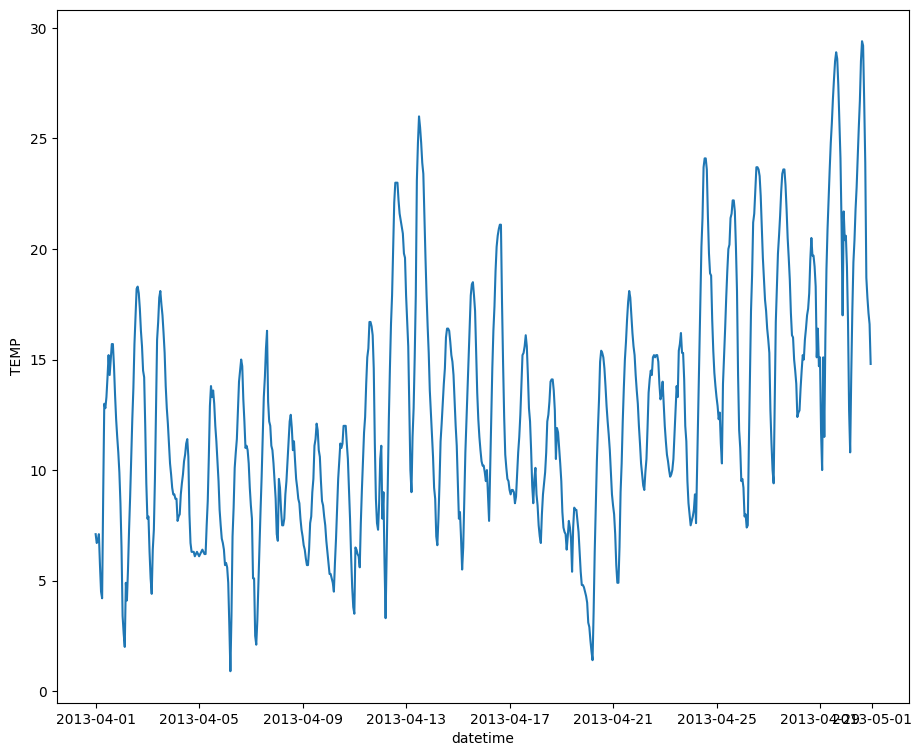

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.lineplot(data=df_Q3, x="datetime", y="TEMP", ax=ax)

Terlihat dalam plot tersebut bahwa data temperatur mengalami kenaikan dan penurunan, tetapi tetap memiliki tren yang cenderung naik.

### Pertanyaan 4:

**Selama periode waktu 1 Maret 2013 s.d. 28 Februari 2017, arah angin kemana yang paling banyak ada di Kotamadya Tiantan?**

Untuk melihat ini, akan dilakukan visualisasi dengan menggunakan pie chart.

Untuk melakukan ini, akan dibuat dataset `df_Q4` untuk menampung data arah angin

In [ ]:
df_Q4 = df[(df.station == "Tiantan")].reset_index().drop("index", axis=1)
df_Q4 = df_Q4["wd"].value_counts().reset_index()
df_Q4

,index,wd
0,ENE,3861
1,E,3564
2,NE,3540
3,ESE,2706
4,SW,2481
5,NW,2466
6,SSW,1953
7,NNE,1928
8,SE,1880
9,N,1865


Berikut merupakan penjelasan tiap value:
- N : utara
- S : selatan
- E : timur
- W : barat
- NW : barat laut
- SW : barat daya
- NE : timur laut
- SE : tenggara
- NNE : utara timur laut
- ENE : timur timur laut
- ESE : timur menenggara/timur tenggara
- SSE : selatan menenggara/selatan tenggara
- SSW : selatan barat daya
- WSW : barat barat daya
- WNW : barat barat laut
- NNW : utara barat laut

Selanjutnya, akan dilakukan pembuatan pie chart dengan menggunakan `plt.pie()`

([<matplotlib.patches.Wedge at 0x78138f1080a0>,
 [Text(1.034836579296502, 0.37297889236512416, 'ENE'),
  Text(0.5839472196664863, 0.9322047224959658, 'E'),
  Text(-0.08447742312246735, 1.096751368808167, 'NE'),
  Text(-0.6538137865999967, 0.884605862772667, 'ESE'),
  Text(-0.9809380433085481, 0.49775551748825164, 'SW'),
  Text(-1.0996183994462139, 0.0289719795551968, 'NW'),
  Text(-1.0257257345075297, -0.39734961629399984, 'SSW'),
  Text(-0.8289378709692231, -0.7230919762194931, 'NNE'),
  Text(-0.539210880041712, -0.9587761088203245, 'SE'),
  Text(-0.19343897700574347, -1.0828579602953343, 'N'),
  Text(0.1630971840087035, -1.0878415824780883, 'WSW'),
  Text(0.4873571003176966, -0.9861455555697277, 'NNW'),
  Text(0.7492317976933238, -0.8053891688651087, 'S'),
  Text(0.9335624924590046, -0.581774073566132, 'SSE'),
  Text(1.0472350226457479, -0.3365988819710487, 'WNW'),
  Text(1.094267136388132, -0.11215807693125457, 'W'),
  Text(1.0999731387376004, -0.007687265817704153, 'Data not availa

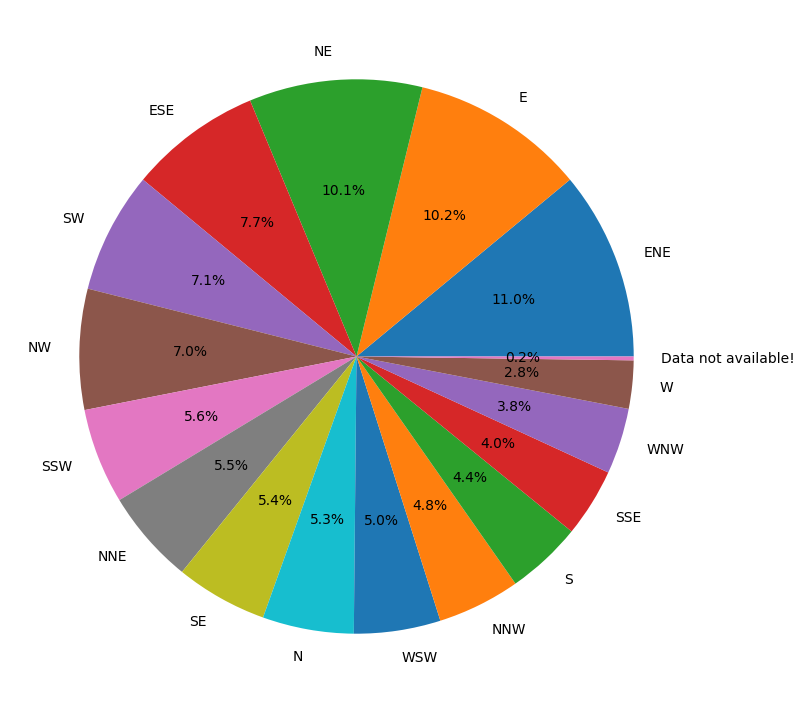

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
plt.pie(df_Q4["wd"], labels=df_Q4["index"], autopct='%1.1f%%')

Diketahui dari pie chart di atas bahwa di Beijing paling banyak angin bertiup ke arah timur timur laut.

## Conclusion

1. Ingin diketahui **bagaimanakah rata-rata kualitas udara Beijing secara keseluruhan pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017.** Jika dilihat secara umum dari indikator-indikator yang ada yaitu PM2.5, PM10 , SO2, NO2, CO, dan O3, dapat disimpulkan bahwa **rata-rata kualitas udara keseluruhan Beijing pada periode waktu tersebut sudah cukup baik**. Tetapi, indikator yang ada di atas belum cukup lengkap untuk dapat menjadi penentu kualitas udara karena masih ada faktor lainnya seperti misalnya curah hujan, arah angin, dll.
2. Ingin diketahui **bagaimanakah perbandingan rata-rata kualitas udara antar Kotamadya di Beijing pada periode waktu 1 Maret 2013 s.d. 28 Februari 2017**. Dari visualisasi yang dilakukan, dapat **diamati secara kasat mata bagaimana perbandingan rata-rata kualitas udara di kotamadya-kotamadya di Beijing**. Antara lain kesimpulan yang dapat diambil adalah secara umum, kualitas udara Huairou adalah salah satu yang paling baik dibandingkan Kotamadya lainnya di Beijing. Sebaliknya, kualitas udara Wanshouxigong dan Aotizhongxin adalah salah satu yang paling buruk dibandingkan Kotamadya lainnya di Beijing. Dapat pula dilakukan penarikan kesimpulan bagi indikator lainnya berdasarkan kasus serupa yang tertera dalam plot di atas.
3. Ingin diketahui **bagaimanakah kecenderungan temperatur yang ada di Kotamadya Dongsi pada Bulan April tahun 2013.** Diketahui bahwa berdasarkan plot di atas diketahui bahwa data temperatur di Kotamadya Dongsi pada bulan April tahun 2013 mengalami kenaikan dan penurunan, tetapi tetap memiliki kecenderungan meningkat.
4. Ingin diketahui **selama periode waktu 1 Maret 2013 s.d. 28 Februari 2017, arah angin kemana yang paling banyak ada di Kotamadya Tiantan.** Setelah dilakukan visualisasi, maka diketahui bahwa arah angin yang paling banyak ada di tempat tersebut adalah ke arah timur timur laut dengan jumlah sebanyak 11% dari data keseluruhan di Beijing.